In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# import ml
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


In [2]:
test_df    = pd.read_csv("/Users/jiteshyadav/Desktop/expedia-hotel-recommendations/test.csv")
hotel_df = pd.read_csv("/Users/jiteshyadav/Desktop/expedia-hotel-recommendations/train.csv", nrows= 5000)

In [3]:
hotel_df.head()
#test_df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,0,3,2,50,628,1
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,0,...,0,1,8250,1,0,1,2,50,628,1
3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,0,...,0,1,14984,1,0,1,2,50,1457,80
4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,0,...,0,1,14984,1,0,1,2,50,1457,21


In [4]:
#Info
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  5000 non-null   object 
 1   site_name                  5000 non-null   int64  
 2   posa_continent             5000 non-null   int64  
 3   user_location_country      5000 non-null   int64  
 4   user_location_region       5000 non-null   int64  
 5   user_location_city         5000 non-null   int64  
 6   orig_destination_distance  2869 non-null   float64
 7   user_id                    5000 non-null   int64  
 8   is_mobile                  5000 non-null   int64  
 9   is_package                 5000 non-null   int64  
 10  channel                    5000 non-null   int64  
 11  srch_ci                    4998 non-null   object 
 12  srch_co                    4998 non-null   object 
 13  srch_adults_cnt            5000 non-null   int64

In [5]:
#Check for missing values
hotel_df.isnull().sum()

date_time                       0
site_name                       0
posa_continent                  0
user_location_country           0
user_location_region            0
user_location_city              0
orig_destination_distance    2131
user_id                         0
is_mobile                       0
is_package                      0
channel                         0
srch_ci                         2
srch_co                         2
srch_adults_cnt                 0
srch_children_cnt               0
srch_rm_cnt                     0
srch_destination_id             0
srch_destination_type_id        0
is_booking                      0
cnt                             0
hotel_continent                 0
hotel_country                   0
hotel_market                    0
hotel_cluster                   0
dtype: int64

In [6]:
#User actually booked hotel
hotel_df[hotel_df['is_booking']==1]

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,1,...,0,1,8250,1,1,1,2,50,628,1
20,2014-02-27 18:01:32,2,3,66,318,52078,NaN,756,0,1,...,0,1,8291,1,1,1,2,50,191,2
27,2013-06-15 15:38:05,30,4,195,548,56440,NaN,1048,0,1,...,0,1,1385,1,1,1,0,185,185,58
72,2014-11-23 18:02:20,30,4,195,991,47725,NaN,1048,0,0,...,0,1,8803,1,1,1,3,151,69,36
79,2014-01-03 16:30:17,2,3,66,462,41898,2454.8588,1482,0,1,...,0,2,12009,1,1,1,2,50,680,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4952,2014-06-11 05:21:10,2,3,77,824,25620,NaN,30850,1,0,...,0,1,43199,1,1,1,3,106,106,25
4958,2014-06-13 17:59:33,2,3,77,824,25620,NaN,30850,0,0,...,0,1,23237,1,1,1,3,106,756,5
4962,2014-06-14 18:12:47,2,3,77,824,25620,NaN,30850,0,0,...,0,1,12592,5,1,1,3,106,108,13
4972,2014-03-08 13:11:45,2,3,66,314,35107,924.7623,30977,0,1,...,0,1,12523,5,1,1,2,50,624,48


In [7]:
# Check the number of rows and column of dataset
print("Shape dataset:", hotel_df.shape)
hotel_df.duplicated().sum()

Shape dataset: (5000, 24)


0

In [52]:
# Convert data in datetime format
hotel_df['date_time'] = pd.to_datetime(
    hotel_df.rename(columns={
        'date_time_year': 'year', 
        'date_time_month': 'month', 
        'date_time_day': 'day'
    })[['year', 'month', 'day']]
)

hotel_df['srch_ci'] = pd.to_datetime(
    hotel_df.rename(columns={
        'srch_ci_year': 'year', 
        'srch_ci_month': 'month', 
        'srch_ci_day': 'day'
    })[['year', 'month', 'day']], 
    errors='coerce'
)

hotel_df['srch_co'] = pd.to_datetime(
    hotel_df.rename(columns={
        'srch_co_year': 'year', 
        'srch_co_month': 'month', 
        'srch_co_day': 'day'
    })[['year', 'month', 'day']], 
    errors='coerce'
)
print(hotel_df[['date_time', 'srch_ci', 'srch_co']].head())



   date_time    srch_ci    srch_co
0 2014-08-11 2014-08-27 2014-08-31
1 2014-08-11 2014-08-29 2014-09-02
2 2014-08-11 2014-08-29 2014-09-02
3 2014-08-09 2014-11-23 2014-11-28
4 2014-08-09 2014-11-23 2014-11-28


In [53]:
print(hotel_df.columns) 
#here there is no column for datetime
#to track the booking date use search- checkin, -checkout date

Index(['srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt',
       'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt',
       'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster',
       'stay_duration', 'is_mobile_1', 'is_package_1', 'channel_1',
       'channel_2', 'channel_3', 'channel_4', 'channel_5', 'channel_6',
       'channel_7', 'channel_9', 'booking_month', 'checkin_year',
       'checkin_month', 'checkin_dayofweek', 'date_time_year',
       'date_time_month', 'date_time_day', 'srch_ci_year', 'srch_ci_month',
       'srch_ci_day', 'srch_co_year', 'srch_co_month', 'srch_co_day',
       'date_time', 'srch_ci', 'srch_co'],
      dtype='object')


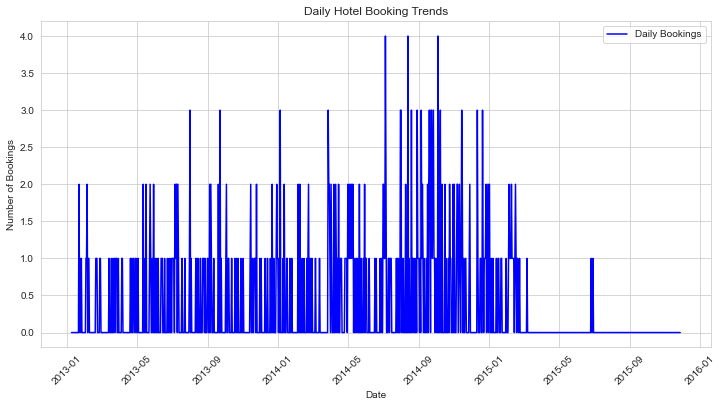

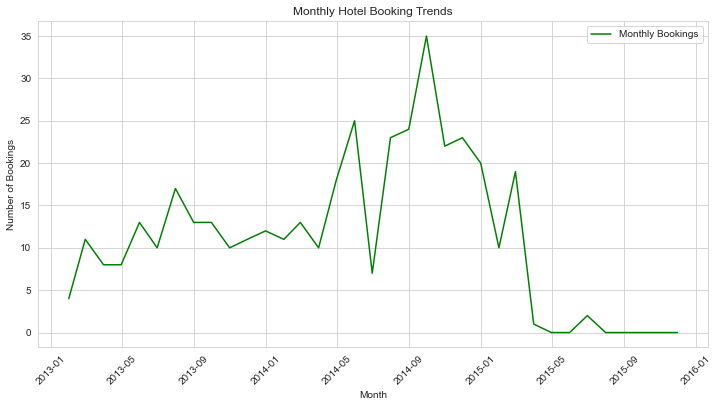

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'srch_ci' (check-in date) to datetime format, handling errors
hotel_df['srch_ci'] = pd.to_datetime(hotel_df['srch_ci'], errors='coerce')

# Drop rows with missing check-in dates
hotel_df = hotel_df.dropna(subset=['srch_ci'])

# Set 'srch_ci' as the index for time-based analysis
hotel_df.set_index('srch_ci', inplace=True)

# ---- Daily Booking Trends ----
# Group by day and sum up the number of bookings
daily_bookings = hotel_df['is_booking'].resample('D').sum()

# Plot daily booking trends
plt.figure(figsize=(12, 6))
plt.plot(daily_bookings, color='blue', label='Daily Bookings')
plt.title('Daily Hotel Booking Trends')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# ---- Monthly Booking Trends ----
# Group by month and sum up the number of bookings
monthly_bookings = hotel_df['is_booking'].resample('M').sum()

# Plot monthly booking trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_bookings, color='green', label='Monthly Bookings')
plt.title('Monthly Hotel Booking Trends')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [55]:
hotel_df['srch_ci'] = pd.to_datetime(hotel_df['srch_ci'], errors='coerce')  # Convert to datetime
hotel_df = hotel_df.dropna(subset=['srch_ci'])  # Remove missing dates
hotel_df.set_index('srch_ci', inplace=True)  # Set as index

print(hotel_df.index[:5])


DatetimeIndex(['2014-08-27', '2014-08-29', '2014-08-29', '2014-11-23',
               '2014-11-23'],
              dtype='datetime64[ns]', name='srch_ci', freq=None)


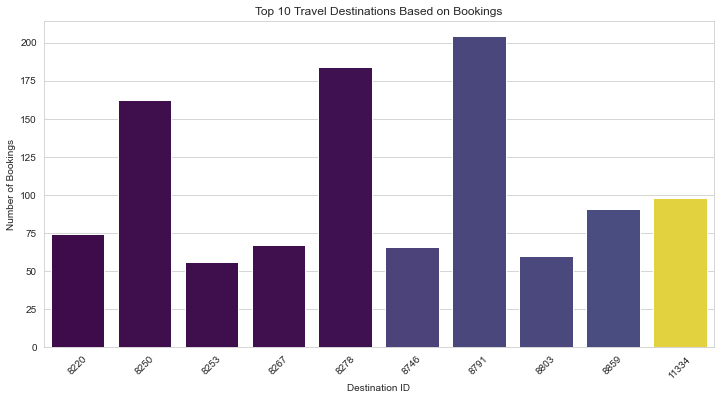

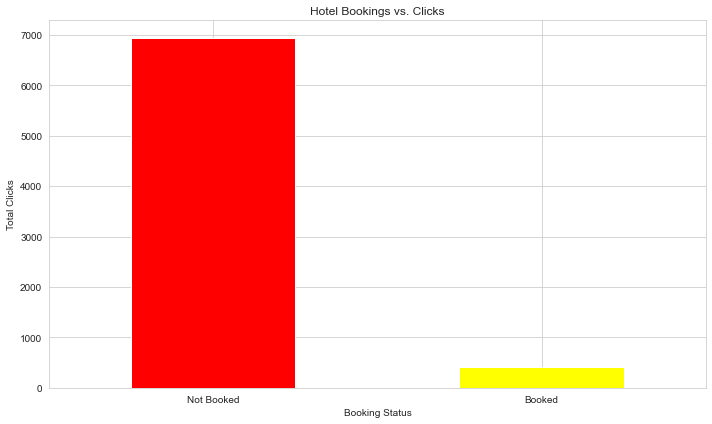

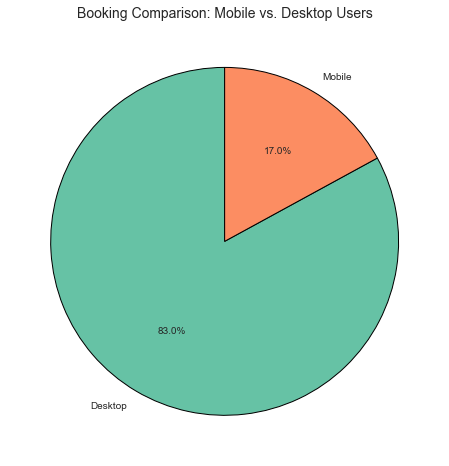

In [11]:
# Top 10 most popular travel destination
import matplotlib.pyplot as plt
import seaborn as sns

# Count bookings for each destination and get the top 10
popular_destinations = hotel_df['srch_destination_id'].value_counts().head(10)
# Plot the top 10 travel destinations
plt.figure(figsize=(12, 6))
sns.barplot(x=popular_destinations.index, y=popular_destinations.values, hue=popular_destinations.index, palette='viridis', legend=False)
plt.title('Top 10 Travel Destinations Based on Bookings')
plt.xlabel('Destination ID')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.show()



# Group by 'is_booking' and sum the 'cnt' (clicks/views)
clicks_vs_bookings = hotel_df.groupby('is_booking')['cnt'].sum()

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
clicks_vs_bookings.plot(kind='bar', color=['red', 'yellow'])

# Adding labels and titles
plt.title('Hotel Bookings vs. Clicks')
plt.xlabel('Booking Status')
plt.ylabel('Total Clicks')
plt.xticks(ticks=[0, 1], labels=['Not Booked', 'Booked'], rotation=0)
plt.tight_layout()

# Display the plot
plt.show()


# Group by 'is_mobile' and count bookings
mobile_booking_counts = hotel_df.groupby('is_mobile')['is_booking'].sum()

# Define colors for better visualization
colors = sns.color_palette("Set2", 2)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(mobile_booking_counts, labels=['Desktop', 'Mobile'], autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title('Booking Comparison: Mobile vs. Desktop Users', fontsize=14)
plt.show()






 First 5 Rows of Dataset:
             date_time  site_name  posa_continent  user_location_country  \
0  2014-08-11 07:46:59          2               3                     66   
1  2014-08-11 08:22:12          2               3                     66   
2  2014-08-11 08:24:33          2               3                     66   
3  2014-08-09 18:05:16          2               3                     66   
4  2014-08-09 18:08:18          2               3                     66   

   user_location_region  user_location_city  orig_destination_distance  \
0                   348               48862                  2234.2641   
1                   348               48862                  2234.2641   
2                   348               48862                  2234.2641   
3                   442               35390                   913.1932   
4                   442               35390                   913.6259   

   user_id  is_mobile  is_package  ...  srch_children_cnt srch_rm_cnt  

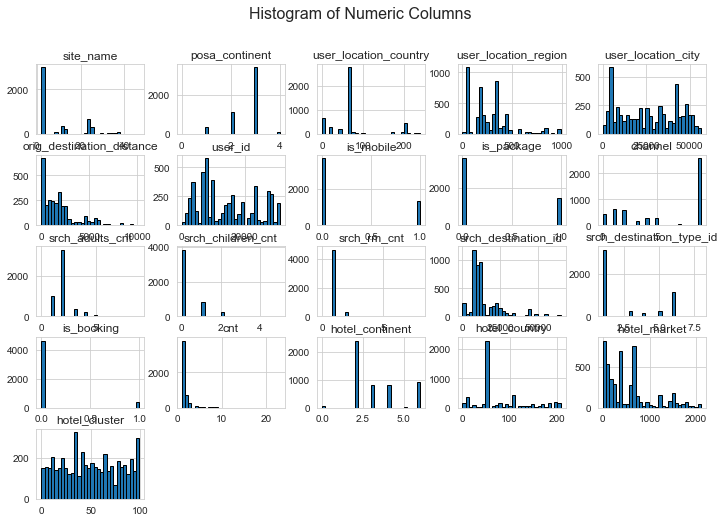

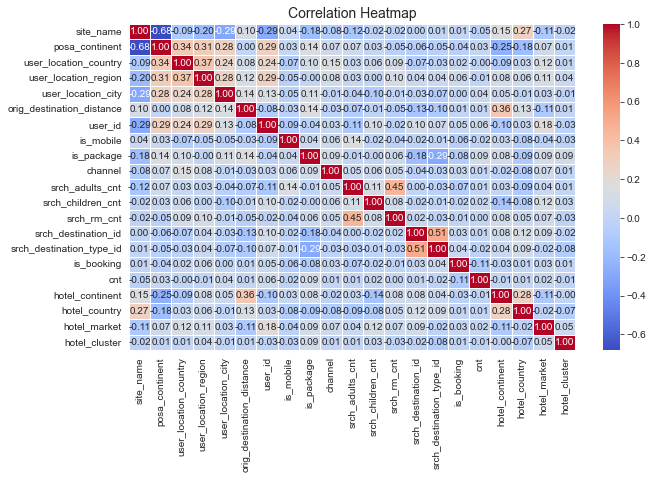

In [75]:
#EDA
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (Replace 'your_file.csv' with your actual filename)
df = pd.read_csv("/Users/jiteshyadav/Desktop/expedia-hotel-recommendations/train.csv", nrows= 5000)

# 1. Basic Information About Dataset
print("\n First 5 Rows of Dataset:")
print(df.head())

print("\n Dataset Shape (Rows, Columns):", df.shape)

print("\n Column Data Types:")
print(df.dtypes)

# 2. Checking Missing Values
print("\n Missing Values in Each Column:")
print(df.isnull().sum())

# 3. Summary Statistics
print("\n Summary Statistics (Numerical Features):")
print(df.describe())

# 4. Checking Unique Values in Categorical Columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n🔹 Unique values in {col}:")
    print(df[col].unique())

# 5. Visualizing Data Distribution
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Histogram of Numeric Columns", fontsize=16)
plt.show()

# 6. Correlation Heatmap (For Numeric Features)
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()







In [83]:
#Data pre-processing
import pandas as pd
# "/Users/jiteshyadav/Desktop/expedia-hotel-recommendations/train.csv", nrows= 5000

# Check for missing values
print("Missing Values in Each Column:\n", hotel_df.isnull().sum())




Missing Values in Each Column:
 date_time                       0
site_name                       0
posa_continent                  0
user_location_country           0
user_location_region            0
user_location_city              0
orig_destination_distance    2131
user_id                         0
is_mobile                       0
is_package                      0
channel                         0
srch_ci                         2
srch_co                         2
srch_adults_cnt                 0
srch_children_cnt               0
srch_rm_cnt                     0
srch_destination_id             0
srch_destination_type_id        0
is_booking                      0
cnt                             0
hotel_continent                 0
hotel_country                   0
hotel_market                    0
hotel_cluster                   0
dtype: int64


In [85]:
hotel_df = pd.read_csv("/Users/jiteshyadav/Desktop/expedia-hotel-recommendations/train.csv", nrows= 5000)  # Reload the original dataset

# Convert 'srch_ci' and 'srch_co' to datetime format
hotel_df['srch_ci'] = pd.to_datetime(hotel_df['srch_ci'], errors='coerce')
hotel_df['srch_co'] = pd.to_datetime(hotel_df['srch_co'], errors='coerce')



In [86]:
# Drop rows where 'srch_ci' or 'srch_co' are missing
hotel_df.dropna(subset=['srch_ci', 'srch_co'], inplace=True)



In [87]:
# Calculate stay duration (days between check-in and check-out)
hotel_df['stay_duration'] = (hotel_df['srch_co'] - hotel_df['srch_ci']).dt.days



In [88]:
# Remove unrealistic stay durations (negative or more than 30 days)
hotel_df = hotel_df[(hotel_df['stay_duration'] > 0) & (hotel_df['stay_duration'] <= 30)]



In [89]:
# Display dataset info after processing
print("\n Final Processed Data Info:")
print(hotel_df.info())


 Final Processed Data Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4971 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date_time                  4971 non-null   object        
 1   site_name                  4971 non-null   int64         
 2   posa_continent             4971 non-null   int64         
 3   user_location_country      4971 non-null   int64         
 4   user_location_region       4971 non-null   int64         
 5   user_location_city         4971 non-null   int64         
 6   orig_destination_distance  2847 non-null   float64       
 7   user_id                    4971 non-null   int64         
 8   is_mobile                  4971 non-null   int64         
 9   is_package                 4971 non-null   int64         
 10  channel                    4971 non-null   int64         
 11  srch_ci                    4971 non-null

Training Data Shape: (3976, 6), Testing Data Shape: (995, 6)
Model Coefficients: [ 0.1304173   0.04270786 -0.01425409  0.23934994 -0.00674529  0.00061013]
Model Intercept: 2.406466880650218
      Actual  Predicted
856        9   2.063678
3676       2   3.667835
3361       1   2.613538
4199       2   3.925890
3888       4   3.212420
Mean Absolute Error (MAE): 1.9886880757127312
Mean Squared Error (MSE): 6.865288308534517
Root Mean Squared Error (RMSE): 2.6201695190453838
R² Score: 0.02111199510198103


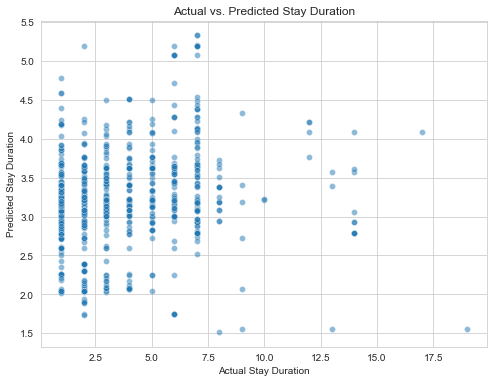

In [90]:
#Linear regression model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select input features (independent variables)
features = ['srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'hotel_continent', 'hotel_country', 'hotel_market']

# Select target variable (dependent variable)
target = 'stay_duration'

# Split data into features (X) and target (y)
X = hotel_df[features]
y = hotel_df[target]

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}, Testing Data Shape: {X_test.shape}")

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model details
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

# Make predictions on test data
y_pred = model.predict(X_test)

# Show sample predictions
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df.head())

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Stay Duration")
plt.ylabel("Predicted Stay Duration")
plt.title("Actual vs. Predicted Stay Duration")
plt.show()


Training Data Shape: (3976, 6), Testing Data Shape: (995, 6)
      Actual  Predicted
856        9   2.365644
3676       2   1.935484
3361       1   2.365644
4199       2   2.208333
3888       4   2.744340
Mean Absolute Error (MAE): 1.4548736780488607
Mean Squared Error (MSE): 4.379350026117142
Root Mean Squared Error (RMSE): 2.0926896631170955
R² Score: 0.37556982064588806


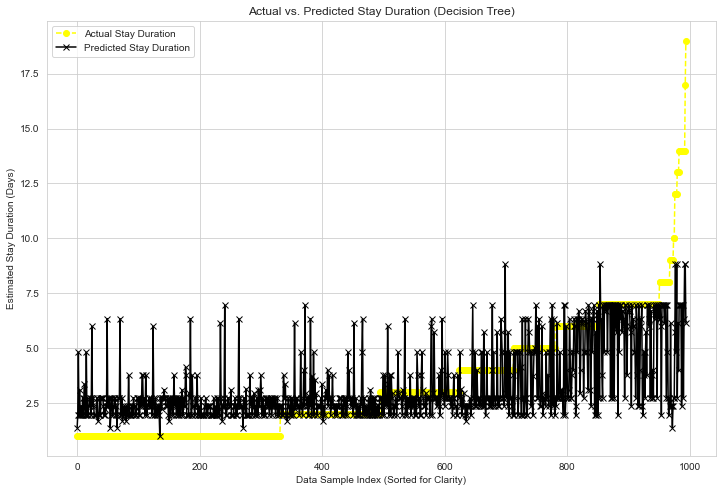

In [91]:
# Decision Tree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select input features (independent variables)
features = ['srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'hotel_continent', 'hotel_country', 'hotel_market']

# Select target variable (dependent variable)
target = 'stay_duration'

# Split data into features (X) and target (y)
X = hotel_df[features]
y = hotel_df[target]

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}, Testing Data Shape: {X_test.shape}")

# Initialize and train the Decision Tree model
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions on test data
y_pred = model.predict(X_test)

# Show sample predictions
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df.head())

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Sort values for better visualization
sorted_indices = np.argsort(y_test.values)
y_test_sorted = y_test.values[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Line plot: Actual vs. Predicted values
plt.figure(figsize=(12, 8))
plt.plot(y_test_sorted, label="Actual Stay Duration", linestyle='dashed', marker='o', color='yellow')
plt.plot(y_pred_sorted, label="Predicted Stay Duration", linestyle='solid', marker='x', color='black')

# Add labels and title
plt.xlabel("Data Sample Index (Sorted for Clarity)")
plt.ylabel("Estimated Stay Duration (Days)")
plt.title("Actual vs. Predicted Stay Duration (Decision Tree)")
plt.legend()
plt.grid(True)
plt.show()


Training Data Shape: (3976, 6), Testing Data Shape: (995, 6)
Feature Importances: [0.09555783 0.06653381 0.03082205 0.0976482  0.16521283 0.54422527]
      Actual  Predicted
856        9   4.104544
3676       2   1.872629
3361       1   1.918223
4199       2   2.261571
3888       4   3.109519
Mean Absolute Error (MAE): 0.9901866039353086
Mean Squared Error (MSE): 3.0117877597929406
Root Mean Squared Error (RMSE): 1.735450304616338
R² Score: 0.5705638599773071


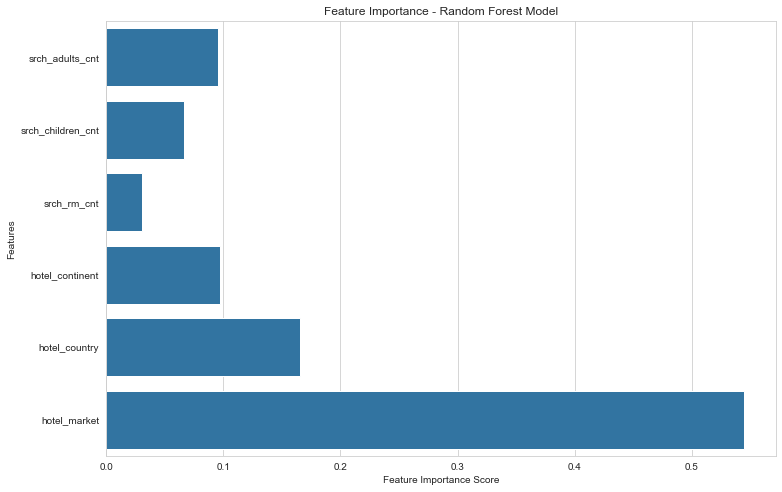

In [92]:
# Random forest

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select input features (independent variables)
features = ['srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'hotel_continent', 'hotel_country', 'hotel_market']

# Select target variable (dependent variable)
target = 'stay_duration'

# Split data into features (X) and target (y)
X = hotel_df[features]
y = hotel_df[target]

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}, Testing Data Shape: {X_test.shape}")

# Initialize and train the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Print feature importance scores (how much each feature affects the prediction)
print("Feature Importances:", model.feature_importances_)

# Make predictions on test data
y_pred = model.predict(X_test)

# Show sample predictions
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df.head())

# Calculate error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Plot feature importance (which features matter most for predictions)
plt.figure(figsize=(12, 8))
sns.barplot(x=model.feature_importances_, y=features)
plt.title("Feature Importance - Random Forest Model")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()


Training Data: (3976, 6), Testing Data: (995, 6)
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
27 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packa

Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': True}
      Actual  Predicted
856        9   4.020895
3676       2   1.944829
3361       1   2.698193
4199       2   3.339654
3888       4   3.054537
Mean Absolute Error (MAE): 1.083505595903845
Mean Squared Error (MSE): 3.1616683682081512
Root Mean Squared Error (RMSE): 1.7781080867619243
R² Score: 0.5491931144017603


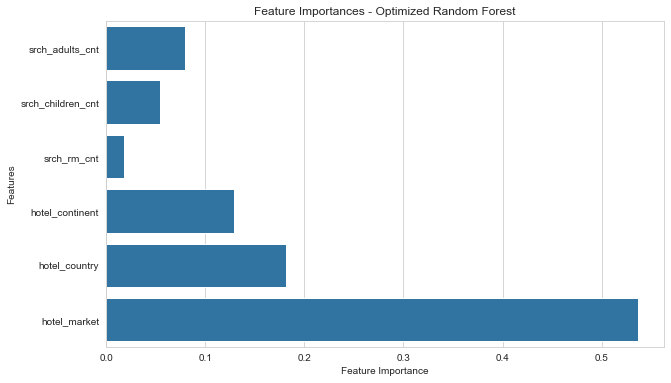

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select features (independent variables)
features = ['srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'hotel_continent', 'hotel_country', 'hotel_market']

# Target variable (dependent variable)
target = 'stay_duration'

# Split the dataset into X (features) and y (target)
X = hotel_df[features]
y = hotel_df[target]

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")

# Define the base model
rf = RandomForestRegressor(random_state=42)

# Define hyperparameter search space for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples per leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Whether to use bootstrapping (sampling with replacement)
}

# Perform Randomized Search with cross-validation
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                               n_iter=20, cv=3, verbose=1, random_state=42, n_jobs=-1)

# Fit the model to training data
rf_random.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Parameters:", rf_random.best_params_)

# Use the best model for predictions
best_rf = rf_random.best_estimator_
y_pred = best_rf.predict(X_test)

# Show sample predictions
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(predictions_df.head())

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Visualize feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=best_rf.feature_importances_, y=features)
plt.title("Feature Importances - Optimized Random Forest")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()


In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Make predictions on the test data using the optimized model
y_pred = optimized_model.predict(X_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R² Score
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 2.4811
Mean Squared Error (MSE): 13.1873
Root Mean Squared Error (RMSE): 3.6314
R² Score: -0.8803


In [95]:
# Code testing for new data, for future work.

import pandas as pd
import numpy as np
import joblib  # For loading the saved model

# Step 1: Load new unseen data
new_data = pd.read_csv("new_hotel_data.csv")  # Replace with the actual file path

# Step 2: Apply the same preprocessing steps
new_data['srch_ci'] = pd.to_datetime(new_data['srch_ci'], errors='coerce')
new_data['srch_co'] = pd.to_datetime(new_data['srch_co'], errors='coerce')
new_data['stay_duration'] = (new_data['srch_co'] - new_data['srch_ci']).dt.days

# Step 3: Select the relevant features (same as training)
features = ['srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'hotel_continent', 'hotel_country', 'hotel_market']
X_new = new_data[features]

# Step 4: Load the trained model
best_model = joblib.load("optimized_random_forest.pkl")  # Load the saved model

# Step 5: Make predictions
new_predictions = best_model.predict(X_new)

# Step 6: Add predictions to the dataframe
new_data["Predicted_Stay_Duration"] = new_predictions

# Step 7: Display some results
print(new_data[['srch_ci', 'srch_co', 'stay_duration', 'Predicted_Stay_Duration']].head())

# Step 8: Save predictions (Optional)
new_data.to_csv("hotel_predictions.csv", index=False)  # Save the new dataset with predictions


FileNotFoundError: [Errno 2] No such file or directory: 'new_hotel_data.csv'